In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import chart_studio.plotly as py
#import plotly.plotly as py
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [6]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [ ]:
df2 = pd.read_csv(r"C:\Users\Genet Shanko\Logistic_optim_Data\nb.csv")
df2.head()

In [ ]:
print("Number of observations &  Number of features", df2.shape)
df2.head()

In [ ]:
df = pd.read_csv(r"C:\Users\Genet Shanko\Logistic_optim_Data\driver_locations_during_request.csv")
df.head()

In [ ]:
print("Oreder data:\n\n", df2.isnull().sum(),  
     "\n\nDeriver data:\n\n", df.isnull().sum())

<AxesSubplot:xlabel='Trip ID', ylabel='Density'>

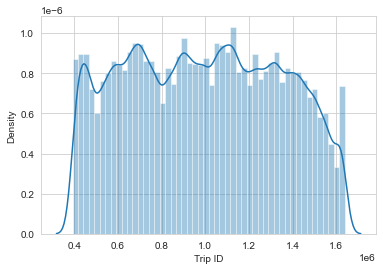

In [11]:
# The distribution of order
sns.distplot(df2['Trip ID'])

# Data Exploration

<AxesSubplot:xlabel='driver_action', ylabel='lng'>

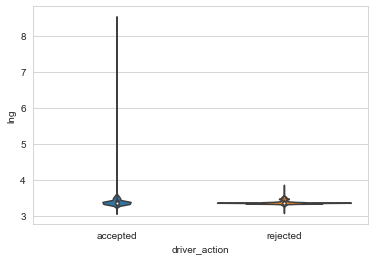

In [13]:
sns.violinplot(x=df['driver_action'],y=df['lng'])

<AxesSubplot:xlabel='driver_action', ylabel='driver_id'>

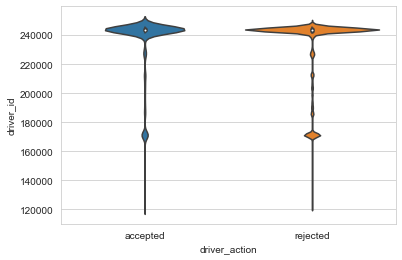

In [14]:
sns.violinplot(x=df['driver_action'],y=df['driver_id'])

<AxesSubplot:xlabel='driver_action', ylabel='lat'>

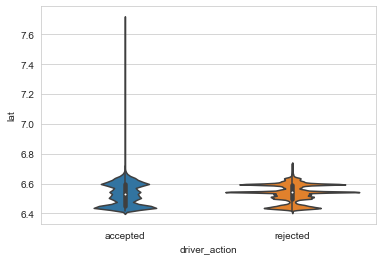

In [15]:
sns.violinplot(x=df['driver_action'],y=df['lat'])

<AxesSubplot:xlabel='driver_action', ylabel='lng'>

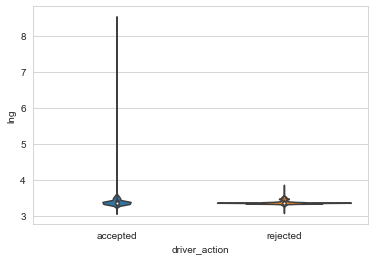

In [16]:
sns.violinplot(x=df['driver_action'],y=df['lng'])

# Joining Tables

In [ ]:
df_merge=df.merge(df2, left_on='order_id', right_on='Trip ID')
df_merge.head()

In [ ]:
df_merge.info()

In [ ]:
sns.violinplot(x=df_merge['driver_id'],y=df_merge['order_id'])

In [ ]:
ax = sns.heatmap(df_merge.corr(),annot=True)

<AxesSubplot:xlabel='driver_action', ylabel='driver_id'>

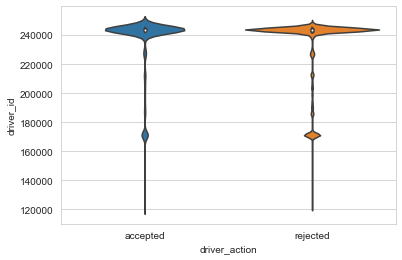

In [61]:
sns.violinplot(x=df_merge['driver_action'],y=df_merge['driver_id'])

In [21]:
 print(sum(pd.isnull(df_merge['Trip Start Time'])))



2022


# Data Preparation

In [29]:
df_merge.pop('created_at')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1557735   NaN
1557736   NaN
1557737   NaN
1557738   NaN
1557739   NaN
Name: created_at, Length: 1557740, dtype: float64

In [30]:
df_merge.pop('updated_at')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1557735   NaN
1557736   NaN
1557737   NaN
1557738   NaN
1557739   NaN
Name: updated_at, Length: 1557740, dtype: float64

In [ ]:
df_merge.head()

# Now let’s check the existence of missing values.

In [ ]:
df_merge.isnull().sum().sort_values(ascending=False)

# Data Cleansing: Categorical features

In [36]:
# Remove the samples without the labels
idx_null = np.where(df_merge['Trip Start Time'].isnull()==1)[0]
df_merge.drop(idx_null, axis=0, inplace=True)

# Fill null item with '0' for attribute 'Order Type'
df_merge.fillna('0', inplace=True)

# Reset index
df_merge.reset_index(drop=True, inplace=True)

There are couple ways to apply calculate distance function to our dataframe. Compare their execution time and find the most optimized way.


In [ ]:
import numpy as np  # for math operations


def haversine(start_lng, start_lat, end_lng, end_lat, radius=6371):
    # converting coordinates to radians
    start_lng_rad = np.radians(start_lng)
    start_lat_rad = np.radians(start_lat)
    end_lng_rad = np.radians(end_lng)
    end_lat_rad = np.radians(end_lat)
    # this uses the ‘haversine’ formula to calculate the great-circle distance between two points (the shortest distance over the earth’s surface)
    distance = 2 * radius * np.arcsin((np.sin((end_lat_rad - start_lat_rad) / 2)**2 + np.cos(start_lat_rad) * np.cos(end_lat_rad) * np.sin((end_lng_rad - start_lng_rad) / 2)**2)**.5)
    return distance

# adding calculated distance to our dataframe    
dist = []
for i, row in df_merge.iterrows():
    dist.append(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude))
df_merge['distance'] = dist

df_merge.head()

In [49]:
df_merge.dropoff_time=df_merge[['Trip End Time']]
df_merge.begin_time=df_merge[['Trip Start Time']]

In [ ]:
df_merge['trip_duration'] = df_merge.dropoff_time -df_merge.begin_time


In [ ]:
df_merge['distance_km'] = round(df_merge.distance_miles*6.60934,2)
df_merge['amount_km'] = round(df_merge.fare_amount/df_merge.distance_km,2)

# Visualize coordinates on boxplot to check for outliers

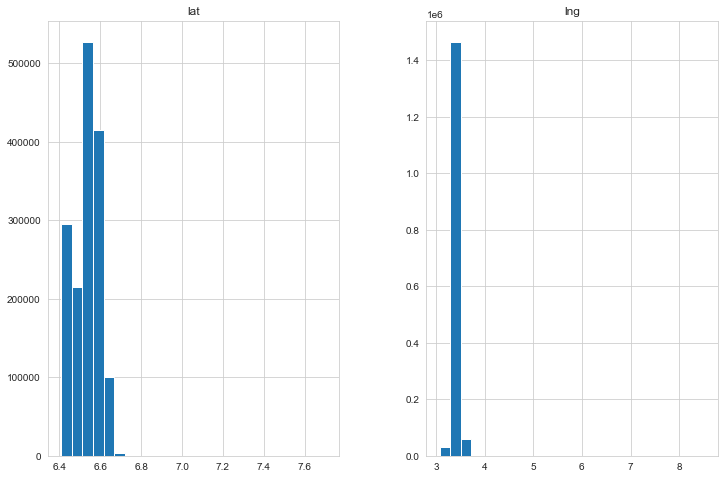

In [68]:
df_merge[['Trip Origin', 'Trip Destination', 'lat','lng']].hist(figsize=(12, 8), bins=25);

<AxesSubplot:xlabel='lat'>

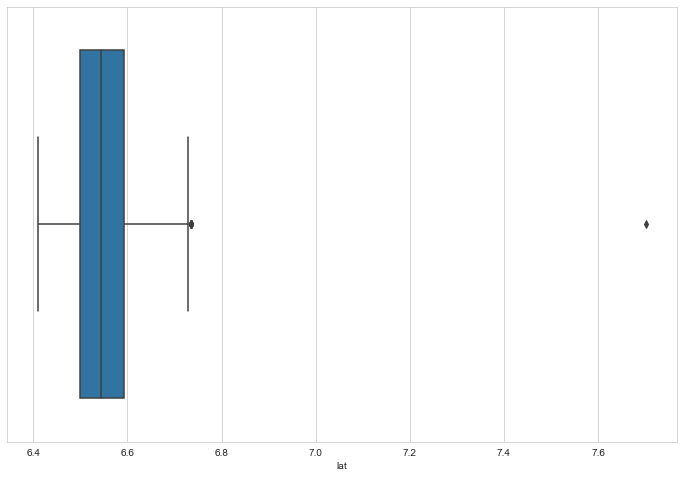

In [56]:
# Pick-up latitude
plt.figure(figsize=(12,8))
sns.boxplot(df_merge.lat)

<AxesSubplot:xlabel='lng'>

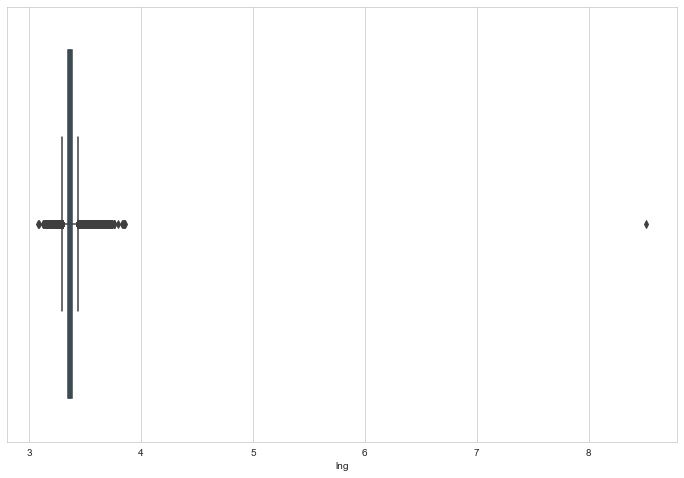

In [57]:
# Pick-up latitude
plt.figure(figsize=(12,8))
sns.boxplot(df_merge.lng )

In [71]:
# separate latitide and longitide from the same column 
df_merge['Trip_Origin_lat'] = df_merge['Trip Origin'].apply(lambda x: str(x).split(',')[0])
df_merge['Trip_Origin_lng'] = df_merge['Trip Origin'].apply(lambda x: str(x).split(',')[1])

In [72]:
# separate latitide and longitide from the same column 
df_merge['Trip_Destination_lat'] = df_merge['Trip Destination'].apply(lambda x: str(x).split(',')[0])
df_merge['Trip_Destination_lng'] = df_merge['Trip Destination'].apply(lambda x: str(x).split(',')[1])

In [74]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.Collecting geopy

     ------------------------------------ 118.9/118.9 KB 347.0 kB/s eta 0:00:00


In [75]:
from geopy import distance

#let's find the distance between origin and destination
df_merge['distance']=df_merge.apply(lambda x:distance.distance((x["Trip_Origin_lat"],x["Trip_Origin_lng"]), 
(x["Trip_Destination_lat"],x["Trip_Destination_lng"])).km,axis=1)

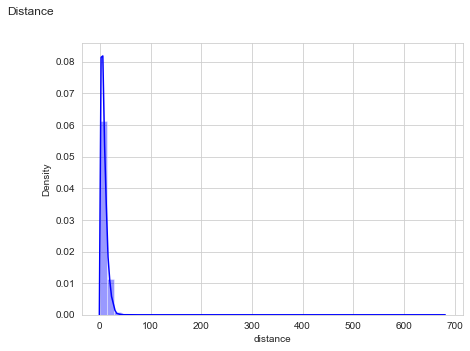

In [76]:
plt.rcParams['figure.figsize']=15,5
plt.subplot(122)
sns.distplot(df_merge['distance'], color='blue')

plt.suptitle('Distance')
plt.show()

In [78]:
pip install holidays


     ------------------------------------ 184.6/184.6 KB 337.9 kB/s eta 0:00:00
     -------------------------------------- 47.9/47.9 KB 400.9 kB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 296.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=f907af3ee8b6d96afacc464475f83bebd3f2159acfa12a0058c9504aa77910b8
  Stored in directory: c:\users\genet shanko\appdata\local\pip\cache\wheels\33\3d\82\4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus


In [79]:
import pandas as pd
from datetime import date
import holidays

In [ ]:
holiday_list = []
for holiday in holidays.Nigeria(years=2021).items():
    holiday_list.append(holiday)

#holidays_df = pd.DataFrame(holiday_list, columns=["date", "holiday"])
#holidays_df
df_merge['Holiday'] = df_merge['Trip Start Time'].isin(holiday_list)
print (df_merge)